# Iris Classification

This project was started as a motivation for learning Machine Learning Algorithms and to learn the different data preprocessing techniques such as Exploratory Data Analysis, Feature Engineering, Feature Selection, Feature Scaling and finally to build a machine learning model.

In this project we will classify the Iris species based on their features such as Sepal length, Sepal width, Petal length and Petal width.

The dataset is collected from [Kaggle](https://www.kaggle.com/uciml/iris). This dataset consists of 3 categories of species which is setosa, versicolor and virginica.

In [1]:
# TODO : Import necessary python libraries needed for this project

# For Data preparation and manipulation
import numpy as np
import pandas as pd
# For reading database
import sqlite3
# For visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Set Seaborn styles
sb.set()

In [2]:
# TODO : Load Iris Dataset

# Load Iris csv dataset
iris_csv = pd.read_csv('../data/Iris.csv')

# Load Iris sqlite data
data = sqlite3.connect('../data/database.sqlite')
query = data.execute('SELECT * FROM Iris')
columns = [col[0] for col in query.description]
iris_db = pd.DataFrame.from_records(data = query.fetchall(), columns = columns)

In [3]:
# TODO : First five rows of iris csv dataset
iris_csv.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# TODO : First five rows iris sqlite database
iris_db.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Since both datas are similar, we can choose any one of them. I am going to choose `iris_db`.

In [5]:
# TODO : Splitting Features and Species as separate dataframes 
features = iris_db.drop(columns = ['Id', 'Species'])
Species = iris_db.Species
print("Iris dataset has {} samples and {} features.".format(*features.shape))

Iris dataset has 150 samples and 4 features.


# Explorative Data Analysis

## Statistics

Let us know some descriptive statistics on iris dataset

In [6]:
features.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let group them by species and do Descriptive statistics

In [7]:
iris_db.drop('Id', axis = 1, inplace = True)
iris_db.groupby('Species').describe().T

Species              Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm count    50.000000        50.000000       50.000000
              mean      5.006000         5.936000        6.588000
              std       0.352490         0.516171        0.635880
              min       4.300000         4.900000        4.900000
              25%       4.800000         5.600000        6.225000
              50%       5.000000         5.900000        6.500000
              75%       5.200000         6.300000        6.900000
              max       5.800000         7.000000        7.900000
SepalWidthCm  count    50.000000        50.000000       50.000000
              mean      3.418000         2.770000        2.974000
              std       0.381024         0.313798        0.322497
              min       2.300000         2.000000        2.200000
              25%       3.125000         2.525000        2.800000
              50%       3.400000         2.800000        3.000000
              75%       3.675000         3.000000        3.175000
              max       4.400000         3.400000        3.800000
PetalLengthCm count    50.000000        50.000000       50.000000
              mean      1.464000         4.260000        5.552000
              std       0.173511         0.469911        0.551895
              min       1.000000         3.000000        4.500000
              25%       1.400000         4.000000        5.100000
              50%       1.500000         4.350000        5.550000
              75%       1.575000         4.600000        5.875000
              max       1.900000         5.100000        6.900000
PetalWidthCm  count    50.000000        50.000000       50.000000
              mean      0.244000         1.326000        2.026000
              std       0.107210         0.197753        0.274650
              min       0.100000         1.000000        1.400000
              25%       0.200000         1.200000        1.800000
              50%       0.200000         1.300000        2.000000
              75%       0.300000         1.500000        2.300000
              max       0.600000         1.800000        2.500000

- **count** shows that there 50 samples for each species.
- **SETOSA**
    - Average sepal length is 5cm
    - Average sepal width is 3cm
    - Average petal length is 1.5cm
    - Average petal width is 0.25cm
- **VERSICOLOR**
    - Average sepal length is 6cm
    - Average sepal width is 2.8cm
    - Average petal length is 4.26cm
    - Average petal width is 1.32cm
- **VIRGINICA**
    - Average sepal length is 6.6cm
    - Average sepal width is 3cm
    - Average petal length is 6cm
    - Average petal width is 2cm
    
From the above information, 
- Based on **Petal length** we can easily classify them as Setosa(1.5cm), Versicolor(4.2cm) and Virginica(6cm).
- Based on **Petal width** we can easily classify Setosa(0.25cm) from Versicolor(1.32cm) and Virginica(2cm).
- **Sepal width** looks similar for all three species - Setosa(3cm), Versicolor(2.8cm) and Virginica(3cm).
- Based on **Sepal length**, there are only small changes on three species (5cm, 6cm and 6.6cm)

Since Sepal width looks similar for all the species, we can drop that feature.

## Feature Observation

Let's plot the data

In [8]:
# TODO : Correlation between the features
features_correlation = iris_db.drop('Species', axis = 1).corr()
features_correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


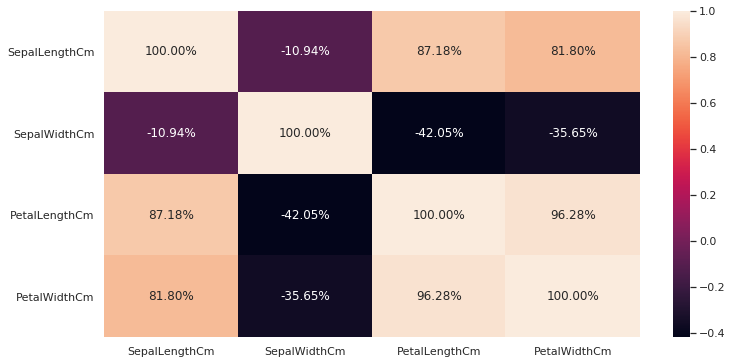

In [37]:
plt.figure(figsize = (12, 6))
sb.heatmap(data = features_correlation, annot = True, fmt = '.2%')
plt.savefig('../blog_images/feature_correlation.png')
plt.show()

<Figure size 432x432 with 0 Axes>

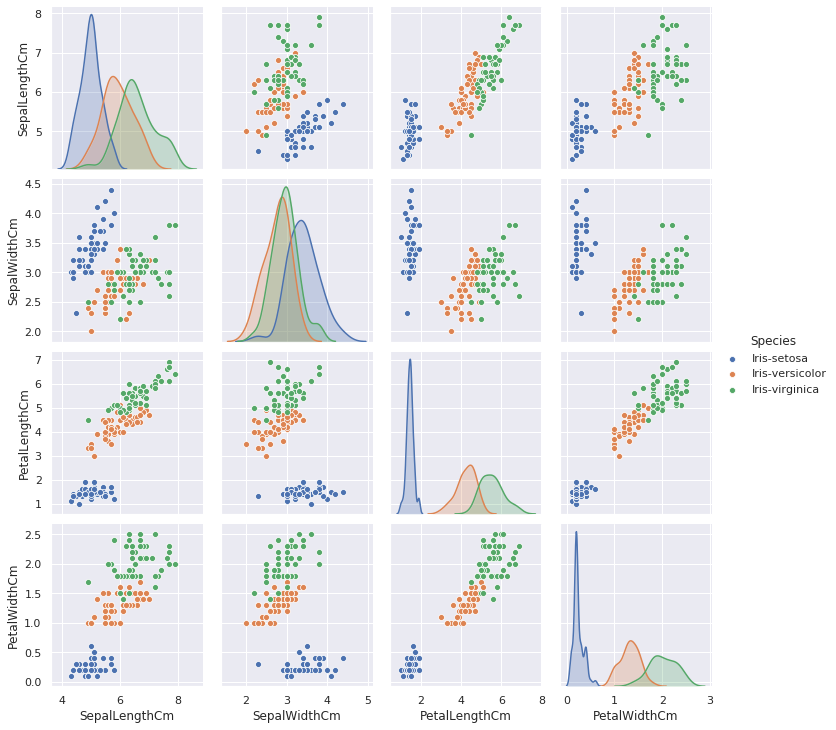

In [32]:
plt.figure(figsize = (6, 6))
sb.pairplot(data = iris_db, hue = 'Species')
plt.savefig('../blog_images/feature_pairplot.png')

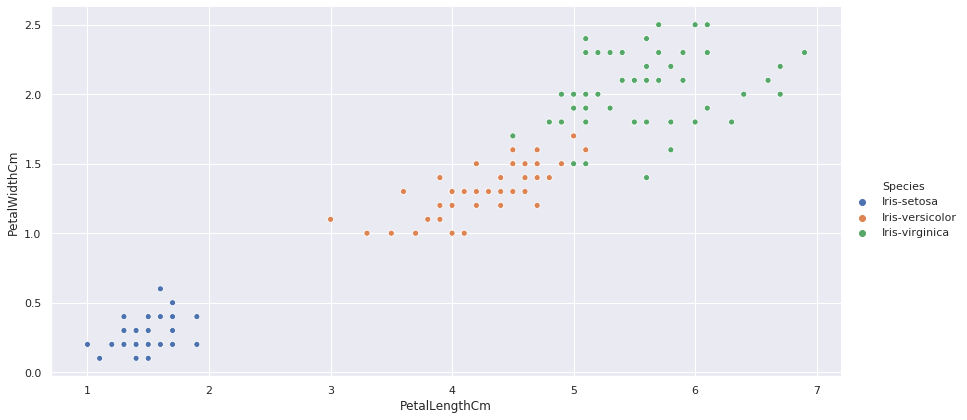

In [33]:
sb.relplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris_db, hue = 'Species', aspect = 2, height = 6)
plt.savefig('../blog_images/petal_length_width.png')

- From the above scatter plot, setosa species clearly classified from other two species.
- Other two species can also be classified based on **Petal Length** and **Petal Width** easily.

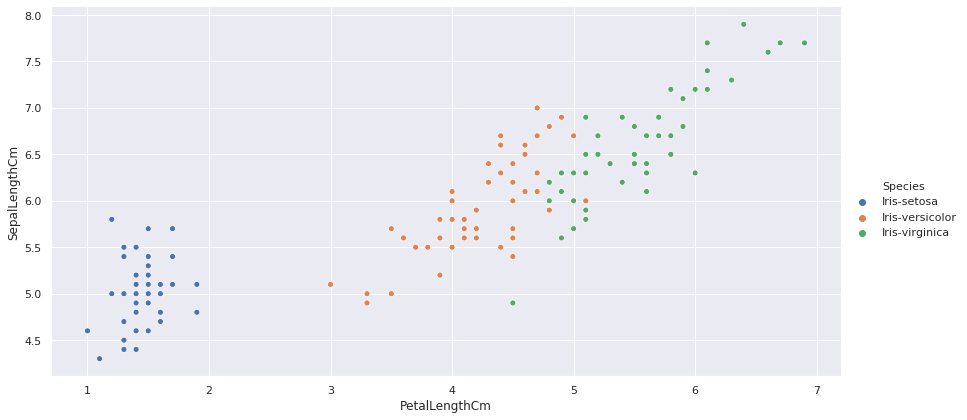

In [35]:
sb.relplot(x = 'PetalLengthCm', y = 'SepalLengthCm', data = iris_db, hue = 'Species', aspect = 2, height = 6)
plt.savefig('../blog_images/petal_sepal_length.png')

- From the above plot, we can separate versicolor and virginica by means of **Petal Length** alone.
- Sepal Length does not contribute more here

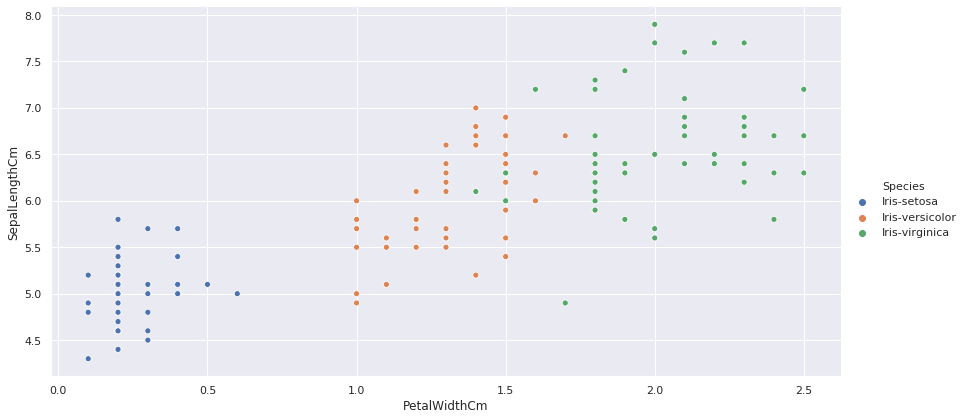

In [36]:
sb.relplot(x = 'PetalWidthCm', y = 'SepalLengthCm', data = iris_db, hue = 'Species', aspect = 2, height = 6)
plt.savefig('../blog_images/petal_width_sepal_length.png')

- From the above plot, we can separate based on **Petal Width** alone.
- Sepal Length doesn't contribute more here.

## Feature Selection

- From the above discussion, we can easily classify the iris species based on petal features than sepal features.

In [14]:
iris_features = iris_db.loc[:, ['PetalLengthCm', 'PetalWidthCm']]
iris_species = iris_db.loc[:, 'Species']

In [15]:
iris_features

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [16]:
iris_species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Building a Machine Learning Model

Based on above explorations on the data, we came to know that we can classify the iris species based on some conditions on Petal Length and PetalWidth.

Let's build a Decision Tree Classier model to the data.

In [17]:
features_values = iris_features.values
species_values = iris_species.values

In [18]:
# TODO : Split the dataset as Train set and Test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_values, species_values, 
                                                    test_size = 0.25, random_state = 42)

In [19]:
# TODO : Print the shape of X_train, X_test, y_train, y_test
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (112, 2)
Shape of X_test :  (38, 2)
Shape of y_train :  (112,)
Shape of y_test :  (38,)


In [20]:
# TODO : Build Decision Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini')

decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Decision Tree classifying Iris species

In [38]:
from sklearn import tree
def plot_decision_tree(decision_tree_classifier):
    plt.figure(figsize=(16, 14))
    tree.plot_tree(decision_tree_classifier, fontsize = 15, feature_names = iris_features.columns, 
                   class_names = ['Setosa', 'Versicolor', 'Virginica'], filled = True)
    plt.savefig('../blog_images/decision_tree.png')

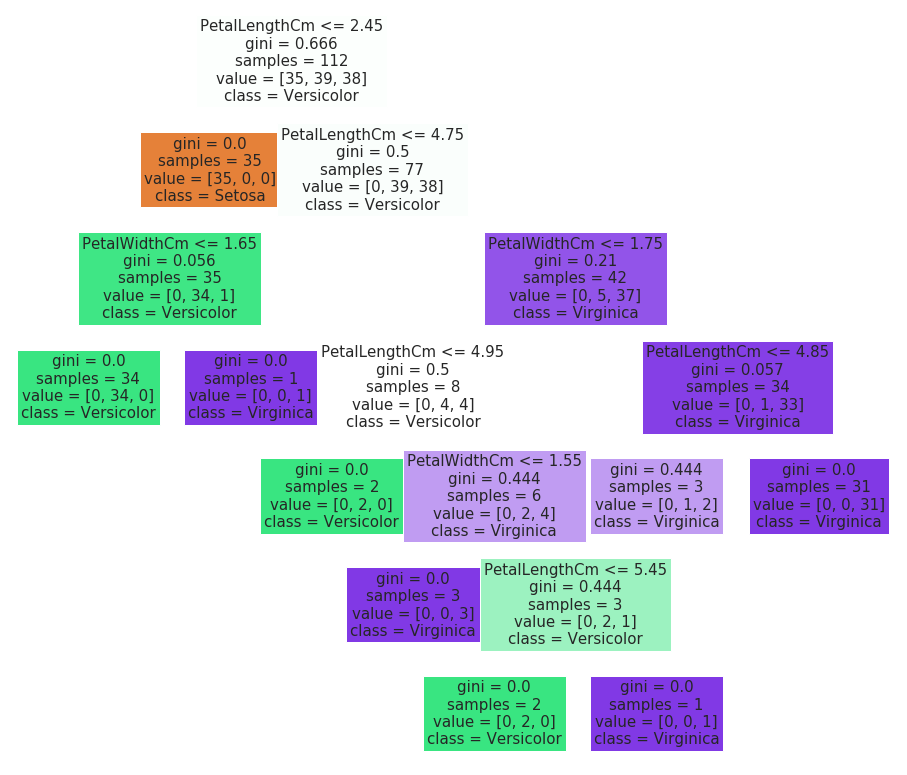

In [22]:
plot_decision_tree(decision_tree_classifier)

<br><br><br><br><br><br><br>

# Model Performance

## Checking model performance by changing max_depth parameter and the criterion as gini

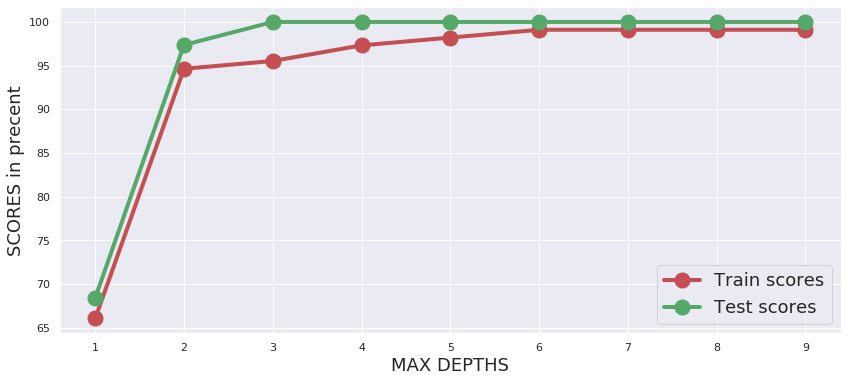

Train Scores :  [66.07142857142857, 94.64285714285714, 95.53571428571429, 97.32142857142857, 98.21428571428571, 99.10714285714286, 99.10714285714286, 99.10714285714286, 99.10714285714286]
Test  Scores :  [68.42105263157895, 97.36842105263158, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [41]:
max_depths = list(range(1, 10))
training_scores = []
test_scores = []
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train)*100)
    test_scores.append(decision_tree_classifier.score(X_test, y_test)*100)
    
plt.figure(figsize = (14, 6))
plt.plot(max_depths, training_scores, 'ro-', linewidth = 4, markersize = 15)
plt.plot(max_depths, test_scores, 'go-', linewidth = 4, markersize = 15)
plt.xlabel('MAX DEPTHS', fontsize = 18)
plt.ylabel('SCORES in precent', fontsize = 18)
plt.legend(labels = ['Train scores', 'Test scores'], fontsize=18)
plt.savefig('../blog_images/model_performance.png')
plt.show()

print ("Train Scores : ", training_scores)
print ("Test  Scores : ", test_scores)

## Checking model performance by changing max_depth parameter and the criterion as entropy

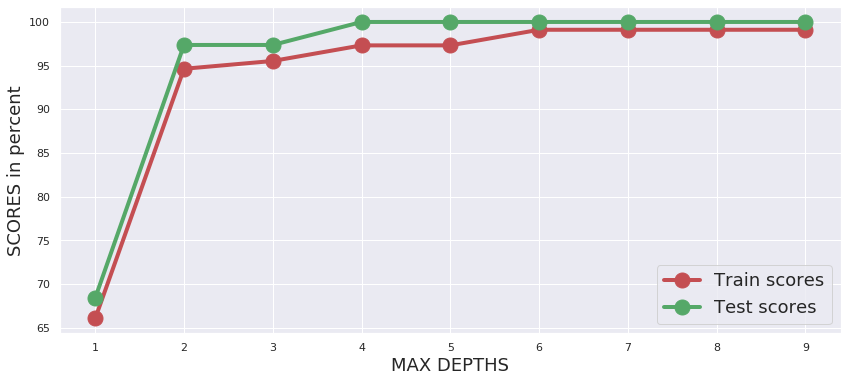

Train Scores :  [66.07142857142857, 94.64285714285714, 95.53571428571429, 97.32142857142857, 97.32142857142857, 99.10714285714286, 99.10714285714286, 99.10714285714286, 99.10714285714286]
Test  Scores :  [68.42105263157895, 97.36842105263158, 97.36842105263158, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [24]:
max_depths = list(range(1, 10))
training_scores = []
test_scores = []
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    test_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)
    
plt.figure(figsize = (14, 6))
plt.plot(max_depths, training_scores, 'ro-', linewidth = 4, markersize = 15)
plt.plot(max_depths, test_scores, 'go-', linewidth = 4, markersize = 15)
plt.xlabel('MAX DEPTHS', fontsize = 18)
plt.ylabel('SCORES in percent', fontsize = 18)
plt.legend(labels = ['Train scores', 'Test scores'], fontsize=18)
plt.show()

print ("Train Scores : ", training_scores)
print ("Test  Scores : ", test_scores)

### We can choose max_depth = 6

### Let's build the optimal model

In [39]:
classifier = DecisionTreeClassifier(max_depth = 6, criterion = 'gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

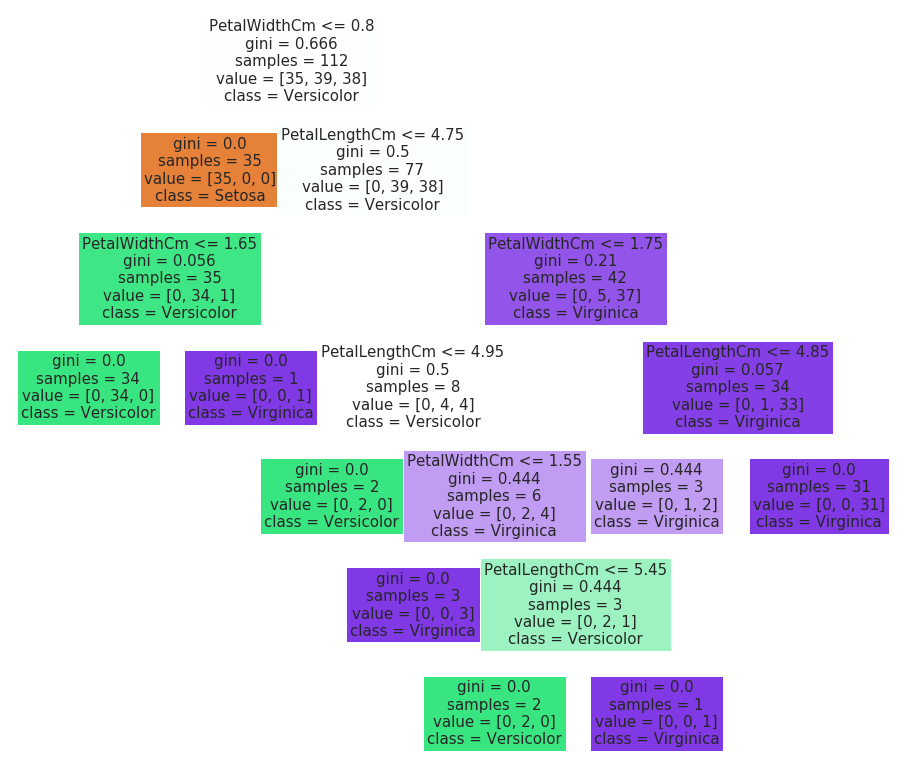

In [40]:
plot_decision_tree(classifier)

In [27]:
from sklearn.metrics import confusion_matrix
print(" Confusion Matrix : \n", confusion_matrix(y_test, classifier.predict(X_test)))

 Confusion Matrix : 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [28]:
print("Training Accuracy : {0:.2f} %".format(classifier.score(X_train, y_train) * 100))
print("Testing Accuracy : {} %".format(classifier.score(X_test, y_test) * 100))

Training Accuracy : 99.11 %
Testing Accuracy : 100.0 %


### Let's predict the test data predictions.

In [29]:
for i in range(X_test.shape[0]):
    print("Petal Length = {}\tPetal Width = {}\tSpecies is {}".format(*X_test[i], classifier.predict([X_test[i]])))

Petal Length = 4.7	Petal Width = 1.2	Species is ['Iris-versicolor']
Petal Length = 1.7	Petal Width = 0.3	Species is ['Iris-setosa']
Petal Length = 6.9	Petal Width = 2.3	Species is ['Iris-virginica']
Petal Length = 4.5	Petal Width = 1.5	Species is ['Iris-versicolor']
Petal Length = 4.8	Petal Width = 1.4	Species is ['Iris-versicolor']
Petal Length = 1.5	Petal Width = 0.4	Species is ['Iris-setosa']
Petal Length = 3.6	Petal Width = 1.3	Species is ['Iris-versicolor']
Petal Length = 5.1	Petal Width = 2.3	Species is ['Iris-virginica']
Petal Length = 4.5	Petal Width = 1.5	Species is ['Iris-versicolor']
Petal Length = 3.9	Petal Width = 1.2	Species is ['Iris-versicolor']
Petal Length = 5.1	Petal Width = 2.0	Species is ['Iris-virginica']
Petal Length = 1.4	Petal Width = 0.1	Species is ['Iris-setosa']
Petal Length = 1.3	Petal Width = 0.2	Species is ['Iris-setosa']
Petal Length = 1.5	Petal Width = 0.1	Species is ['Iris-setosa']
Petal Length = 1.5	Petal Width = 0.3	Species is ['Iris-setosa']
Petal L

<br><br><br>

Finally we finishes the project. We have built a Decision Tree Classifier which performs well with given features petal length and petal width and having the Training accuracy of 99.11% and Testing accuracy of 100%.

### Thank you Everyone for reading my notebook. 

### If you love my work, kindly give a Star to my repository. 

### Facing any issues, feel free to post your issues on my GitHub.